### CHF Data

#### Data Dictionary

- Patient ID--Patient ID Number
- LOS--Length of Stay
- Age--Patient Age Category
- Sex--Patient Gender
	
	
- AmtReim--Amount Paid by Medicare
- TotAccomChg--Total Accomodation Charges
- TotDeptChg--Total Departmental Charges
- NumDxCodes--Number of Diagnosis Codes on Claim
- admsrc--Admission Source
- dischdesc--Discharge Destination
- drgcode--MS-DRG Code

	


In [1]:
#data preprocessing and upload
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('dataset.csv')
except:
    df = pd.read_csv('Documents/Health Data Analysis/dataset.CSV')

In [3]:
display(df)

,Patient,LOS,Age,Sex,AmtReim,TotAccomChg,TotDeptChg,TotChg,NumDxCodes,admsrc,dischdest,drgcode,Gender Description,Discharge Destination Description,Unnamed: 14
0,1,8,4,1,10372,19632,8144,27776,9,4,6,291,Male,Discharged/transferred to home care,NaN
1,2,5,4,2,10306,12270,23259,35529,9,1,1,291,Female,Discharged to home/self care (routine charge).,NaN
2,3,2,4,2,10306,4908,12834,17742,9,1,1,291,Female,Discharged to home/self care (routine charge).,NaN
3,4,2,5,2,10372,4908,5459,10367,9,7,1,291,Female,Discharged to home/self care (routine charge).,NaN
4,5,2,3,2,6200,4908,8893,13801,7,1,1,293,Female,Discharged to home/self care (routine charge).,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,15,4,1,8352,48810,51408,100218,9,4,6,292,Male,Discharged/transferred to home care,NaN
386,387,2,4,2,9348,4908,32164,37072,7,7,50,291,Female,Hospice - home (eff. 10/96),NaN
387,388,12,7,2,7361,29448,29337,58785,9,7,3,292,Female,Discharged/transferred to skilled nursing faci...,NaN
388,389,2,3,2,5088,4908,8346,13254,8,4,6,292,Female,Discharged/transferred to home care,NaN


In [5]:
#delete unnamed row of data not applicable
del df['Unnamed: 14']
display(df)

,Patient,LOS,Age,Sex,AmtReim,TotAccomChg,TotDeptChg,TotChg,NumDxCodes,admsrc,dischdest,drgcode,Gender Description,Discharge Destination Description
0,1,8,4,1,10372,19632,8144,27776,9,4,6,291,Male,Discharged/transferred to home care
1,2,5,4,2,10306,12270,23259,35529,9,1,1,291,Female,Discharged to home/self care (routine charge).
2,3,2,4,2,10306,4908,12834,17742,9,1,1,291,Female,Discharged to home/self care (routine charge).
3,4,2,5,2,10372,4908,5459,10367,9,7,1,291,Female,Discharged to home/self care (routine charge).
4,5,2,3,2,6200,4908,8893,13801,7,1,1,293,Female,Discharged to home/self care (routine charge).
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,15,4,1,8352,48810,51408,100218,9,4,6,292,Male,Discharged/transferred to home care
386,387,2,4,2,9348,4908,32164,37072,7,7,50,291,Female,Hospice - home (eff. 10/96)
387,388,12,7,2,7361,29448,29337,58785,9,7,3,292,Female,Discharged/transferred to skilled nursing faci...
388,389,2,3,2,5088,4908,8346,13254,8,4,6,292,Female,Discharged/transferred to home care


,Gender Description,LOS
0,Female,7.109375
1,Male,6.883838


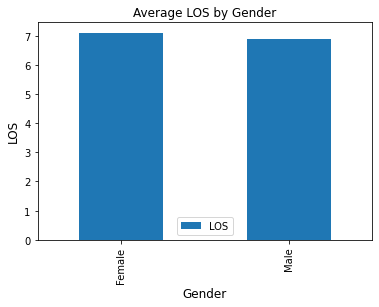

In [6]:
#mean LOS by gender
CHFgenders = df.groupby('Gender Description', as_index=False).agg({'LOS' : 'mean'})
display(CHFgenders)

barplot = CHFgenders.plot(x='Gender Description', kind='bar')
plt.title('Average LOS by Gender')
plt.ylabel('LOS', fontsize=12)
plt.xlabel('Gender', fontsize=12)


plt.show()

,Gender Description,drgcode
0,Female,291.760417
1,Male,291.808081


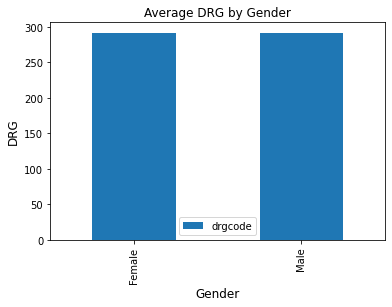

In [7]:
#mean DRG by gender
CHFgenders = df.groupby('Gender Description', as_index=False).agg({'drgcode' : 'mean'})
display(CHFgenders)

barplot = CHFgenders.plot(x='Gender Description', kind='bar')
plt.title('Average DRG by Gender')
plt.ylabel('DRG', fontsize=12)
plt.xlabel('Gender', fontsize=12)


plt.show()

### Conclusion
- The top length of stay averages 7 days for females and 6 days for males. Additional data to evaluate why there is a day of difference with females. Is this because the clinical presentation of females compared to males is much more different?  
- When looking at the comparison of males to females we see that the average top DRG code for Females to males are 291.. however this is looking at all of the DRG codes among the data set so this is not a true value.. lets look at this further below.

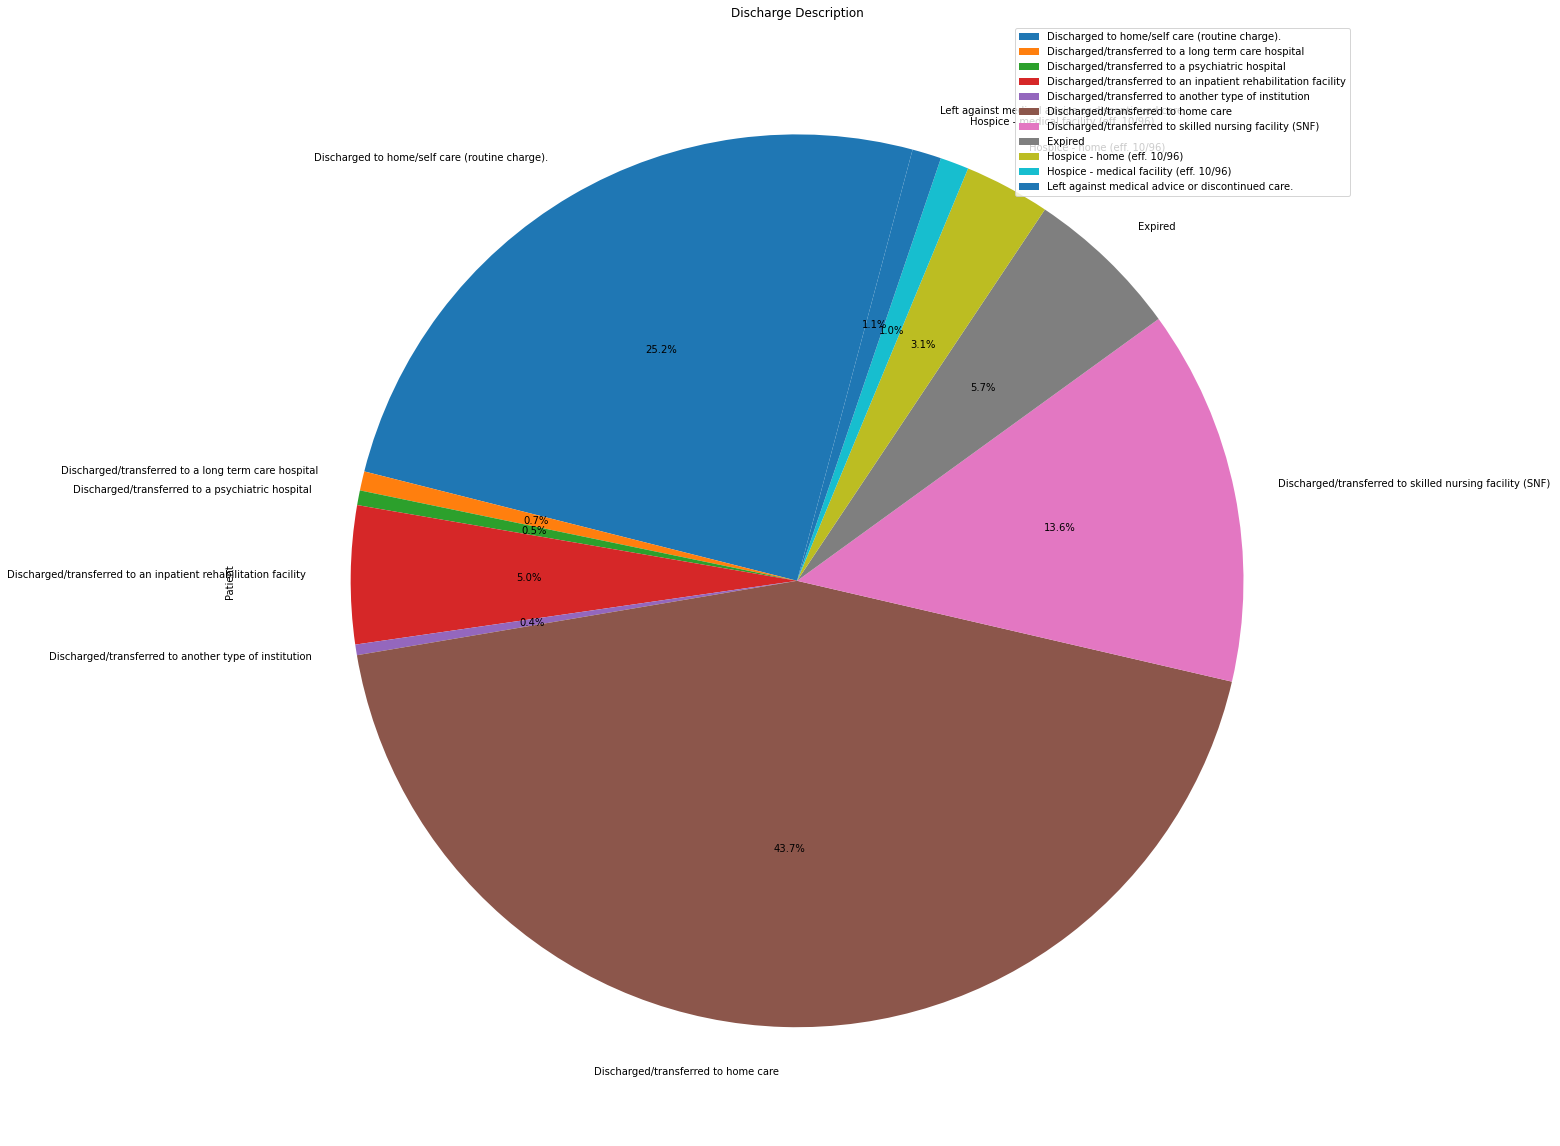

In [8]:
#patients with this discharge type
df.groupby(['Discharge Destination Description']).sum().plot(kind='pie', y='Patient',startangle=75,
figsize=(20,25), autopct='%1.1f%%')
plt.title('Discharge Description')
# Finally showing the plot 
plt.show()

#### conclusion
We see the top 3 discharge dispositions with CHF are Transferred to home care(needing nursing staff to assist at home), home/self care(not needing a nurse to assist at home home), and discharged to a skilled nursing facility. 

,Discharge Destination Description,Gender Description,Patient
0,Discharged to home/self care (routine charge).,Female,174.088889
1,Discharged to home/self care (routine charge).,Male,196.551724
2,Discharged/transferred to a long term care hos...,Female,44.000000
3,Discharged/transferred to a long term care hos...,Male,161.666667
4,Discharged/transferred to a psychiatric hospital,Female,280.000000
5,Discharged/transferred to a psychiatric hospital,Male,126.000000
6,Discharged/transferred to an inpatient rehabil...,Female,131.533333
7,Discharged/transferred to an inpatient rehabil...,Male,183.700000
8,Discharged/transferred to another type of inst...,Female,292.000000
9,Discharged/transferred to home care,Female,199.120000


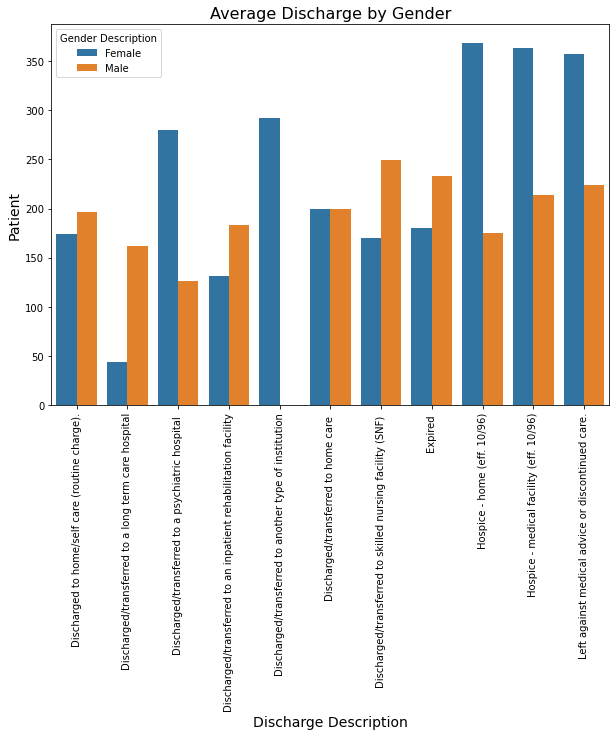

In [9]:
# discharge by gender barchart
discharge_by_gender = df.groupby(['Discharge Destination Description', 'Gender Description']).mean()['Patient'].reset_index()
display(discharge_by_gender) 

plt.figure(figsize=(10, 7))
sns.barplot(data=discharge_by_gender, x='Discharge Destination Description', y='Patient', hue='Gender Description')
plt.title('Average Discharge by Gender', size=16)
plt.ylabel('Patient', fontsize=14)
plt.xlabel('Discharge Description', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Conclusion
We see that the top female population is discharges to home, hospice, or left against medical advice or discontinued care
We see that the top male population is discharged/transferred to skilled nursing facility, expired, or left against medical advice or discontinued care.

,drgcode,Gender Description,Patient
0,291,Female,184.698795
1,291,Male,213.804878
2,292,Female,199.736111
3,292,Male,191.486111
4,293,Female,170.675676
5,293,Male,202.272727


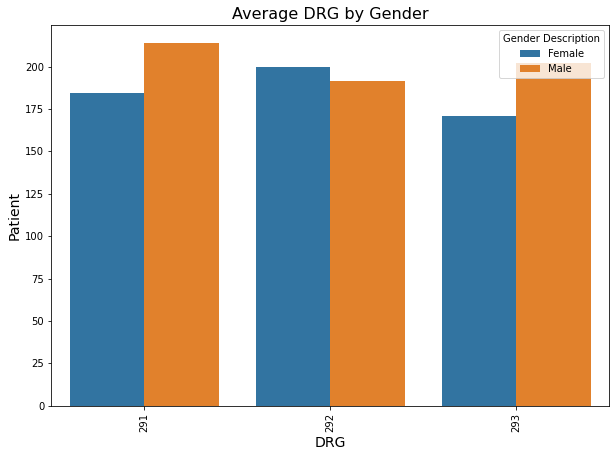

In [10]:
DRG_by_gender = df.groupby(['drgcode', 'Gender Description']).mean()['Patient'].reset_index()
display(DRG_by_gender) 

plt.figure(figsize=(10, 7))
sns.barplot(data=DRG_by_gender, x='drgcode', y='Patient', hue='Gender Description')
plt.title('Average DRG by Gender', size=16)
plt.ylabel('Patient', fontsize=14)
plt.xlabel('DRG', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Conclusion
The top DRG for females is DRG 292-: HEART FAILURE AND SHOCK WITH COMPLICATION OR COMORBIDITY (CC)
The top DRG for Males for this data set is 291-: HEART FAILURE AND SHOCK WITH MAJOR COMPLICATION OR COMORBIDITY (MCC)

Further evaluation could be done to pull additional data related to these DRG codes and joining this data with information related to specific regions of the country. Additionally we could see if there was more public data related to demographics information to do further dataa analysis to see if the poplulations of males vs. females might be specific races or regions. This could identify disparate health care populations per region. This data set is not specific enough to provide this information.